In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [2]:

df = pd.read_csv("/content/file.csv")

In [3]:

df.dropna(subset=["tweets", "labels"], inplace=True)

In [4]:

df.reset_index(drop=True, inplace=True)

In [5]:
print("DataFrame Shape:", df.shape)
print(df.head())

DataFrame Shape: (219294, 3)
   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad


In [6]:

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # -1 to 1 (Negative to Positive)

    if polarity > 0:
        return "good"
    elif polarity < 0:
        return "bad"
    else:
        return "neutral"

In [7]:

df["predicted_labels"] = df["tweets"].apply(get_sentiment)

In [8]:
print(df.head())

   Unnamed: 0                                             tweets   labels  \
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral   
1           1  Try talking with ChatGPT, our new AI system wh...     good   
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral   
3           3  THRILLED to share that ChatGPT, our new model ...     good   
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad   

  predicted_labels  
0          neutral  
1             good  
2          neutral  
3             good  
4             good  


In [9]:

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["tweets"])  # Features
y = df["labels"]  # Actual labels

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [12]:

y_pred = model.predict(X_test)

In [13]:

print("\n📊 Model Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("\n📜 Classification Report:\n", classification_report(y_test, y_pred))


📊 Model Accuracy: 66.51314439453704 %

📜 Classification Report:
               precision    recall  f1-score   support

         bad       0.63      0.99      0.77     21474
        good       0.81      0.60      0.69     11204
     neutral       0.76      0.11      0.19     11181

    accuracy                           0.67     43859
   macro avg       0.73      0.57      0.55     43859
weighted avg       0.71      0.67      0.60     43859



In [14]:

def predict_sentiment(tweet):
    processed_tweet = vectorizer.transform([tweet])
    sentiment = model.predict(processed_tweet)[0]
    print(f"\nTweet: {tweet}\nPredicted Sentiment: {sentiment}")


In [24]:

predict_sentiment("It was a nice day yesterday")


Tweet: It was a nice day yesterday
Predicted Sentiment: good


<ipython-input-18-595c12fd7bbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="predicted_labels", palette="coolwarm")


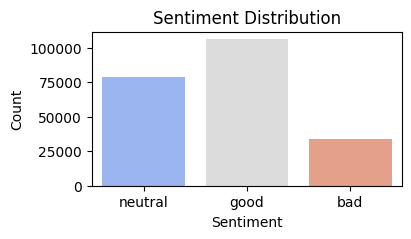

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,2))
sns.countplot(data=df, x="predicted_labels", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

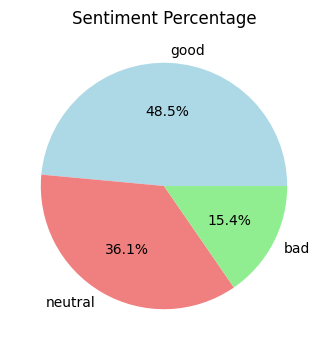

In [20]:
plt.figure(figsize=(4,4))
df["predicted_labels"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()

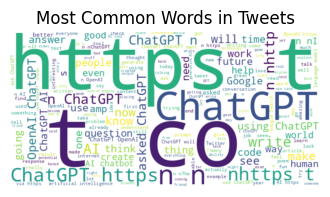

In [22]:
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
all_words = " ".join(tweet for tweet in df["tweets"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(4,3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

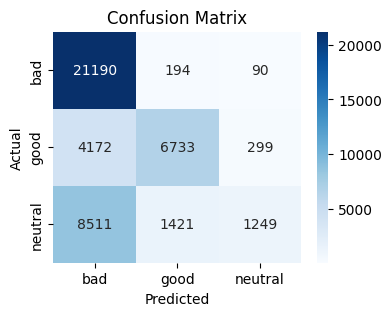

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()